# Deep Learning on Custom Images - Part 2

## Import Libraries

In [1]:
import cv2
from keras.preprocessing.image import ImageDataGenerator, image
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Conv2D, MaxPooling2D, Dense
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


## Inspect the Data

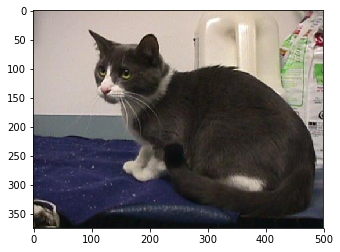

In [2]:
cat4 = cv2.imread('../DATA/CATS_DOGS/train/CAT/4.jpg')

cat4 = cv2.cvtColor(cat4, cv2.COLOR_BGR2RGB)

plt.imshow(cat4);

In [3]:
cat4.shape

(375, 500, 3)

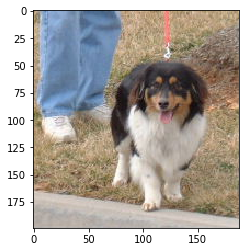

In [4]:
dog2 = cv2.imread('../DATA/CATS_DOGS/train/DOG/2.jpg')

dog2 = cv2.cvtColor(dog2, cv2.COLOR_BGR2RGB)

plt.imshow(dog2);

In [5]:
dog2.shape

(199, 188, 3)

Note that the shape of the images is different.

## Image Data Generator

In [6]:
dog2.max()

255

In [7]:
image_generator = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.20,
    horizontal_flip=True,
    fill_mode='nearest'
)

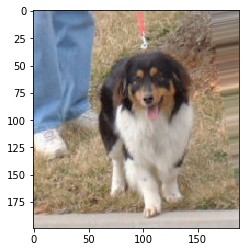

In [8]:
plt.imshow(image_generator.random_transform(dog2))

In [9]:
image_generator.flow_from_directory('../DATA/CATS_DOGS/train/')

Found 18743 images belonging to 2 classes.


## Building the Model

In [10]:
input_shape=(150, 150, 3)

In [11]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units=128))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(1))

model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)             0         
__________

### Preparing the Data

In [13]:
batch_size = 16

train_image_generator = image_generator.flow_from_directory(
    '../DATA/CATS_DOGS/train',
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary'
)

Found 18743 images belonging to 2 classes.


In [14]:
test_image_generator = image_generator.flow_from_directory(
    '../DATA/CATS_DOGS/test',
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary'
)

Found 6251 images belonging to 2 classes.


In [15]:
train_image_generator.class_indices

{'CAT': 0, 'DOG': 1}

In [16]:
results = model.fit_generator(
    train_image_generator,
    epochs=1,
    steps_per_epoch=150,
    validation_data=test_image_generator,
    validation_steps=12
)

Epoch 1/1
150/150 [==============================] - 349s 2s/step - loss: 0.7014 - acc: 0.5195 - val_loss: 0.6895 - val_acc: 0.5462


In [17]:
results.history['acc']

[0.5181932246171496]

In [18]:
results.history

{'val_loss': [0.6895472207864253],
 'val_acc': [0.5461526155624365],
 'loss': [0.7015169355621003],
 'acc': [0.5181932246171496]}

## Loading a Pre-trained Model

In [19]:
new_model = load_model('../DATA/cat_dog_100epochs.h5')

In [20]:
dog_file = '../DATA/CATS_DOGS/test/DOG/10005.jpg'

dog_image = image.load_img(dog_file, target_size=input_shape[:2])

dog_image = image.img_to_array(dog_image)

print(dog_image.shape)

dog_image = np.expand_dims(dog_image, axis=0)

dog_image = dog_image / 255

(150, 150, 3)


In [21]:
new_model.predict_classes(dog_image)

array([[1]], dtype=int32)

In [22]:
new_model.predict(dog_image)

array([[0.9939143]], dtype=float32)